# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.
Total points 6

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [2]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [3]:
zipfile.extractall()

In [4]:
! ls ml-latest-small/

README.txt  links.csv   movies.csv  ratings.csv tags.csv


In [5]:
! head  ./ml-latest-small/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [6]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any columns is null

In [7]:
# write pandas code here
"""checking movie df for null values"""
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

# Q 2 (.25 point) Check datatype of columns

In [8]:
# write pandas code here
"""check dtypes movie df"""
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on  series genres, build following  unique_genere set. It should contain all the unique genres from genres column. Print unique genres too.



In [9]:
# write pandas code here
"""split genres string on "|" take set of unique genres then print"""
unique_genre = pd.unique(movie.genres.str.split('|').sum())
unique_genre = set(unique_genre)
unique_genre

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Q 4 (1 point) build columns for different genres with value True or False based on whether a  genre is present or not in an observation?



In [10]:
# write pandas code here
"""
Map function to split genre on "|" character for each record. Record existence of genre True/False for columns
corresponding to genre in unique_genre
"""
for genre in unique_genre:
    movie[genre] = movie.genres.map(lambda x: genre in x.split('|'))
movie.head(10)

,movieId,title,genres,Action,Sci-Fi,Film-Noir,Horror,Adventure,IMAX,Animation,...,Mystery,Drama,Crime,Children,Documentary,Western,Fantasy,War,Thriller,Romance
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,False,False,False,True,False,True,...,False,False,False,True,False,False,True,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,6,Heat (1995),Action|Crime|Thriller,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
6,7,Sabrina (1995),Comedy|Romance,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,8,Tom and Huck (1995),Adventure|Children,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
8,9,Sudden Death (1995),Action,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,GoldenEye (1995),Action|Adventure|Thriller,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


# Q5(1 point) Build year column in movie data frame. Year are embedded in title columns




Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [11]:
# write pandas code here
"""
Use regular expression to find all years in title matching below pattern.
Movies with no year in title will be set to 999
"""
movie['year'] = ["".join(re.findall(r'\([0-9]{4,4}-*[0-9]*\)', year)) for year in movie['title']]
movie['year'] = movie['year'].str.replace(r'[\(\)]', '', regex=True)
movie['year'] = movie['year'].str.replace(r'^\s*$', '999', regex=True)
movie['year'] = movie['year'].astype(int)

# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

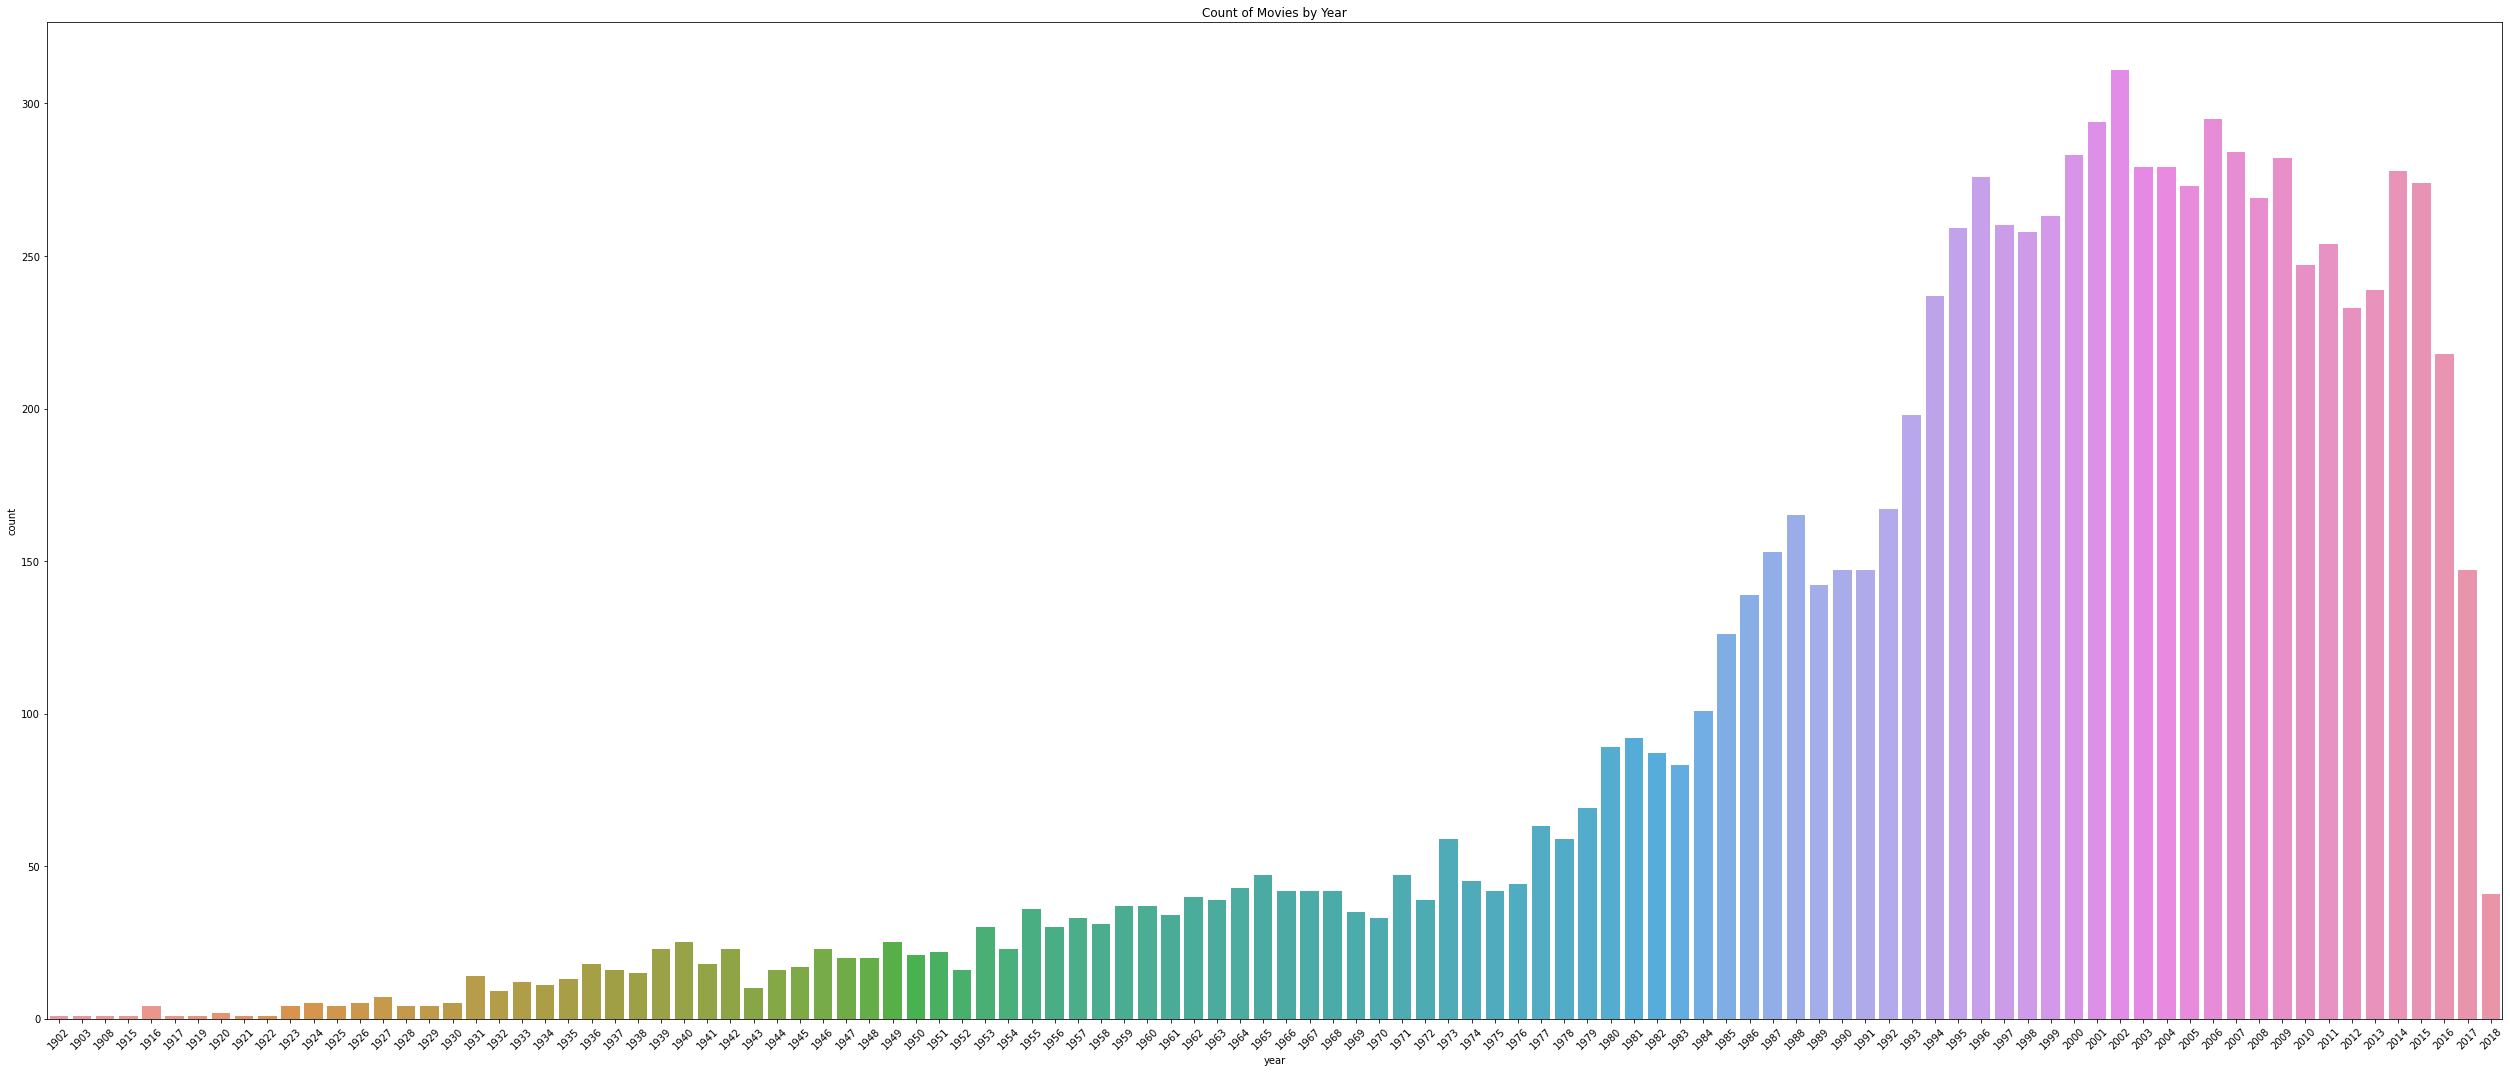

In [12]:
plt.figure(figsize=(35, 15))
count_plot = sns.countplot(x='year',data=movie[movie['year'] != 999])
count_plot.set_title('Count of Movies by Year')
count_plot.tick_params(axis='x', rotation=45)
plt.tight_layout()

Plotting a count of movies made by year shows an upward trend until around 2003 when the number of movies made per year starts decreasing. This hints at the rise in popularity of streaming services begining in the mid to late 2010's.

# Q7.(1 point) Using matplotlib, plot total number of movies in different genres over the year. Plot should have proper title, axis labels and legends.

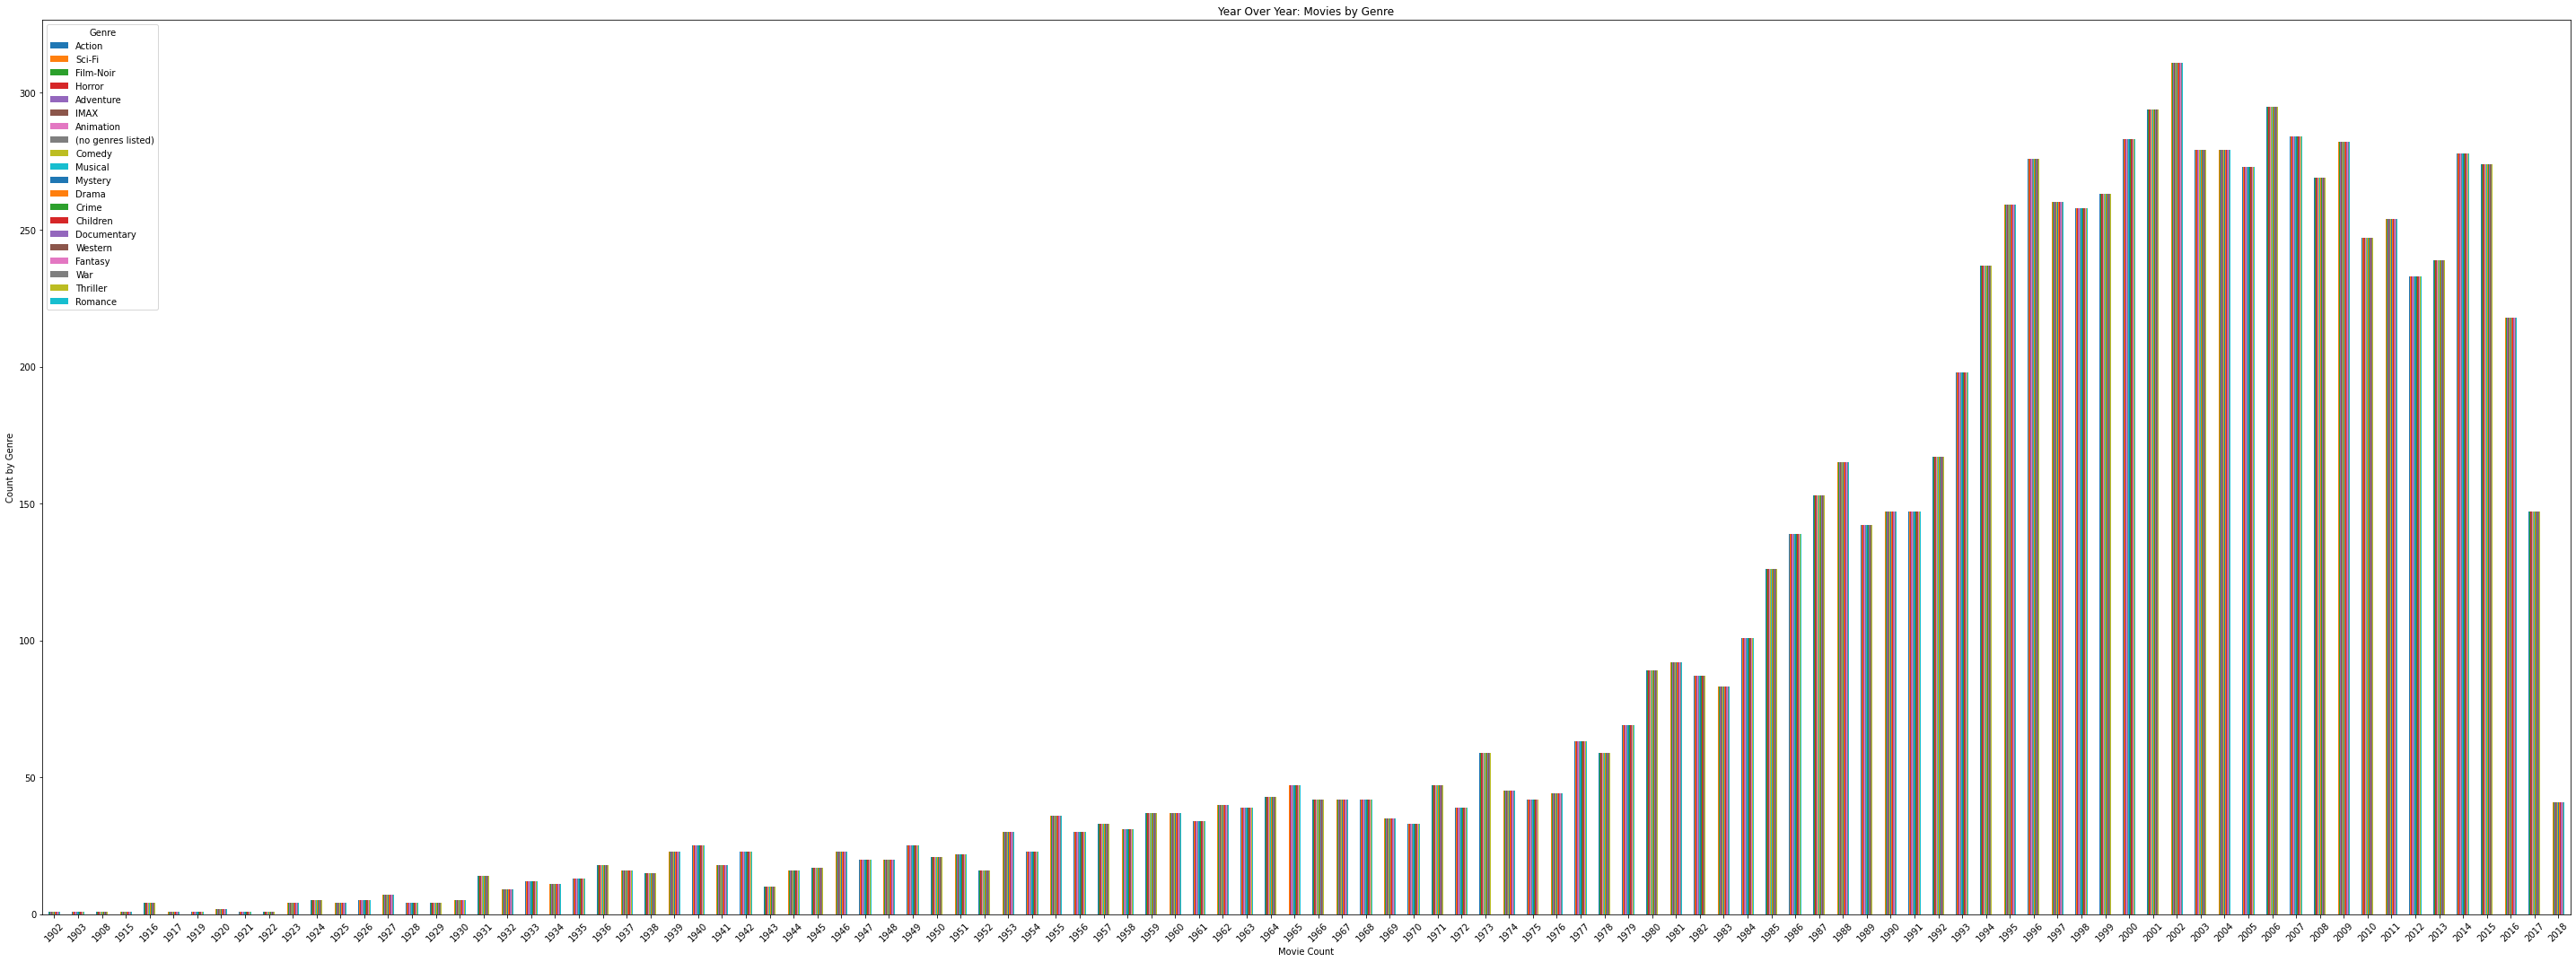

In [13]:
%matplotlib inline
# prepare the data
buckets =list(unique_genre)
movies_by_year_genre = movie[movie['year'] != 999].groupby(by='year').count()[buckets]
movies_by_year_genre.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(40, 15))
movie_plot = movies_by_year_genre.plot(
                          kind='bar',
                          x='year',
                          stacked=False, ax=ax
)
plt.xlabel('Movie Count')
plt.ylabel('Count by Genre')
plt.legend(title='Genre')
plt.title('Year Over Year: Movies by Genre')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie(It should not contain year). Drop the original *title* columns. Display final movie dataFrame too.

In [14]:
# write pandas code here
"""
remove year from title and create new column "movie_title"
drop title and reindex movie_title to idx[1] of movie dataframe
"""
movie['movie_title'] = movie['title'].replace(r'\([0-9]{4,4}-*[0-9]*\)', '', regex=True)
movie['movie_title'] = movie['movie_title'].str.strip()
movie.drop(columns=['title'], inplace=True)
cols = movie.columns.values.tolist()
cols.insert(1, cols.pop(cols.index('movie_title')))
movie = movie[cols]

In [15]:
"""display the final movie dataframe"""
movie.head(10)

,movieId,movie_title,genres,Action,Sci-Fi,Film-Noir,Horror,Adventure,IMAX,Animation,...,Drama,Crime,Children,Documentary,Western,Fantasy,War,Thriller,Romance,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,False,False,False,False,True,False,True,...,False,False,True,False,False,True,False,False,False,1995
1,2,Jumanji,Adventure|Children|Fantasy,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,1995
2,3,Grumpier Old Men,Comedy|Romance,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,1995
4,5,Father of the Bride Part II,Comedy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
5,6,Heat,Action|Crime|Thriller,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,1995
6,7,Sabrina,Comedy|Romance,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1995
7,8,Tom and Huck,Adventure|Children,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,1995
8,9,Sudden Death,Action,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
9,10,GoldenEye,Action|Adventure|Thriller,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,1995


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the year in different genres. Write your observation in no more than 2 lines.

<AxesSubplot:xlabel='year', ylabel='count'>

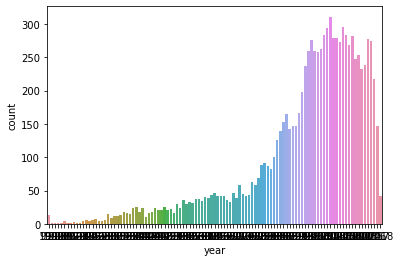

In [16]:
# Write code here.
movie['word_count'] = movie['movie_title'].apply(lambda x : len(nltk.RegexpTokenizer(pattern=r'\w+', gaps=False).tokenize(x.lower())))
movie_stuff = movie.groupby(['year']).aggregate('sum')
sns.countplot(data=movie, x='year')